# ImageDataGenerator를 사용한 데이터 로딩/증강

# 데이터 준비


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

In [1]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/keras_howto_2021/raw/master/data/dogs_prepared.tar.gz
!ls -al  

--2021-10-11 15:53:23--  https://github.com/dhrim/keras_howto_2021/raw/master/data/dogs_prepared.tar.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/dogs_prepared.tar.gz [following]
--2021-10-11 15:53:23--  https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   247MB/s    in 0.2s    

2021-10-11 15:53:26 (247 MB/s) - ‘dogs_prepared.tar.gz’ s

In [2]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

# 영상 데이터 로딩

## 데이터 로딩

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(
).flow_from_directory(
      "dogs_prepared/train", # 영상 데이터 폴더
      target_size=(224,224), # 로딩한 후 변경할 크기
      batch_size=8,          # 한번에 꺼낼 영상 수
      class_mode="sparse"  , # 레이블 값을 one-hot 인코딩이 아닌 카테고리 인덱스로
)

Found 1531 images belonging to 10 classes.


## 데이터 꺼내기

In [27]:
images, labels = image_data_generator.next()

print(images.shape)
print(labels.shape)

(8, 224, 224, 3)
(8,)


## 영상 보기

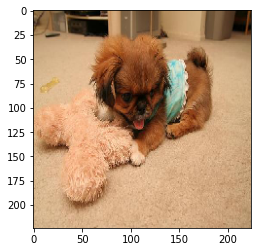

labels[0] = 3.0


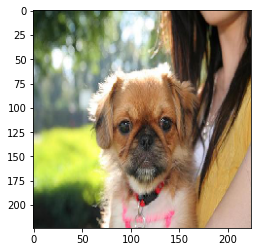

labels[1] = 3.0


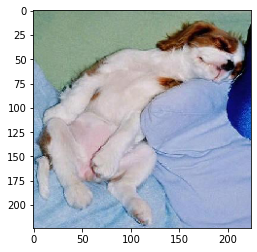

labels[2] = 5.0


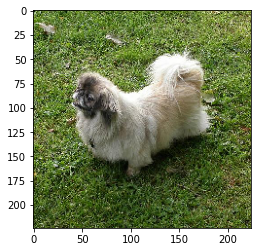

labels[3] = 3.0


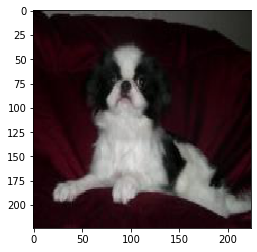

labels[4] = 1.0


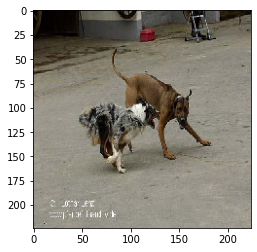

labels[5] = 8.0


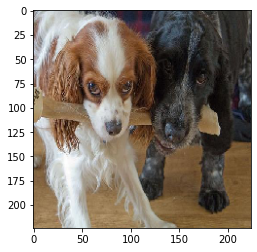

labels[6] = 5.0


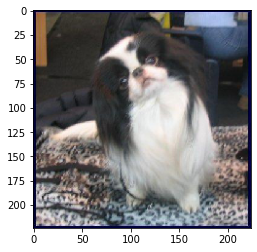

labels[7] = 1.0


In [28]:
for i in range(len(images)):
  # plt.imshow() 호출 시에 이미지 값은 0 ~ 1 사이의 실수 이거나 0 ~ 255의 정수이어야 한다.
  plt.imshow(images[i]/255.)
  plt.show()
  print("labels[{}] = {}".format(i,labels[i]))

## 데이터 갯수와 값들
영상 갯수, batch size, 이미지 모양은 다음으로 참조할 수 있다.

In [30]:
print("image count = {}".format(image_data_generator.n))
print("batch size = {}".format(image_data_generator.batch_size))
print("image shape = {}".format(image_data_generator.image_shape))

image count = 1531
image count = 1531
batch size = 8
image shape = (224, 224, 3)


## 카테고리 이름

 카테고리 레이블 이름은 다음으로 참조할 수 있다.

In [7]:
label_2_index = image_data_generator.class_indices
print(label_2_index)
index_2_label = {v: k for k, v in label_2_index.items()}
print(index_2_label)

for category_index, category_name in index_2_label.items():
  print(category_index, category_name)

{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9}
{0: 'n02085620-Chihuahua', 1: 'n02085782-Japanese_spaniel', 2: 'n02085936-Maltese_dog', 3: 'n02086079-Pekinese', 4: 'n02086240-Shih-Tzu', 5: 'n02086646-Blenheim_spaniel', 6: 'n02086910-papillon', 7: 'n02087046-toy_terrier', 8: 'n02087394-Rhodesian_ridgeback', 9: 'n02088094-Afghan_hound'}
0 n02085620-Chihuahua
1 n02085782-Japanese_spaniel
2 n02085936-Maltese_dog
3 n02086079-Pekinese
4 n02086240-Shih-Tzu
5 n02086646-Blenheim_spaniel
6 n02086910-papillon
7 n02087046-toy_terrier
8 n02087394-Rhodesian_ridgeback
9 n02088094-Afghan_hound


하나로 모으면

Found 1531 images belonging to 10 classes.


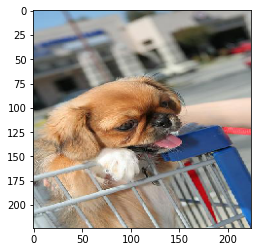

label=n02086079-Pekinese, index=3.0


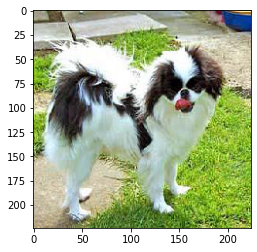

label=n02085782-Japanese_spaniel, index=1.0


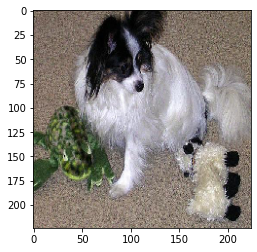

label=n02086910-papillon, index=6.0


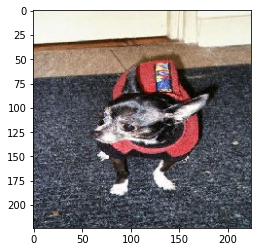

label=n02085620-Chihuahua, index=0.0


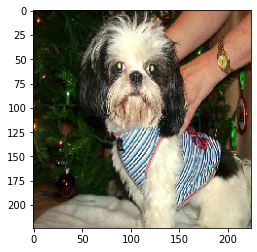

label=n02086240-Shih-Tzu, index=4.0


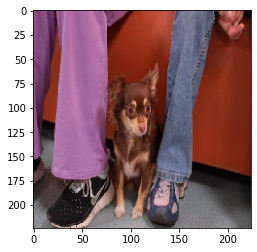

label=n02085620-Chihuahua, index=0.0


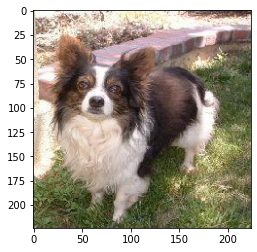

label=n02086910-papillon, index=6.0


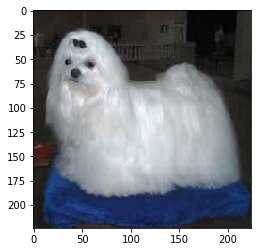

label=n02085936-Maltese_dog, index=2.0


In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 로딩
image_data_generator = ImageDataGenerator(
).flow_from_directory(
      "dogs_prepared/train", # 영상 데이터 폴더
      target_size=(224,224), # 로딩한 후 변경할 크기
      batch_size=8,          # 한번에 꺼낼 영상 수
      class_mode="sparse"  , # 레이블 값을 one-hot 인코딩이 아닌 카테고리 인덱스로
)


# 카테고리 이름 구하기
label_2_index = image_data_generator.class_indices
index_2_label = {v: k for k, v in label_2_index.items()}


# 데이터 꺼내기
images, labels = image_data_generator.next()


# 데이터 보기
for i in range(len(images)):
  plt.imshow(images[i]/255.)
  plt.show()
  category_index = labels[i]
  category_name = index_2_label[category_index]
  print("name={}, index={}".format(category_name, category_index))

# 영상 데이터 증강 - 폴더에서 읽어서

ImageDataGenerator 인스턴스 생성 시에 증강할 옵션을 설정한다.


Found 1531 images belonging to 10 classes.


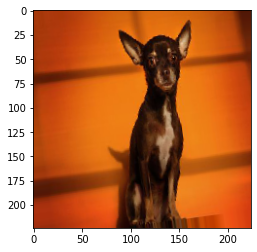

label=n02085620-Chihuahua, index=0.0


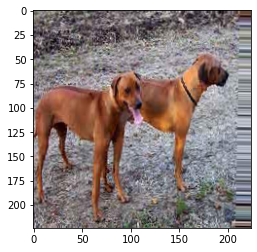

label=n02087394-Rhodesian_ridgeback, index=8.0


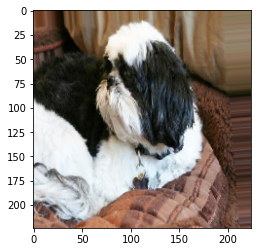

label=n02086240-Shih-Tzu, index=4.0


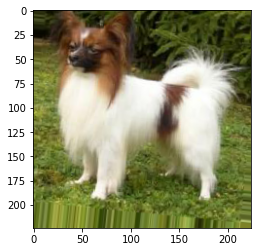

label=n02086910-papillon, index=6.0


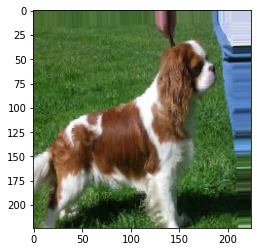

label=n02086646-Blenheim_spaniel, index=5.0


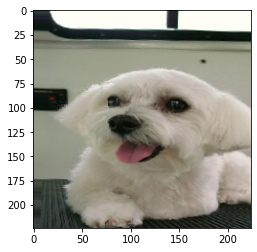

label=n02085936-Maltese_dog, index=2.0


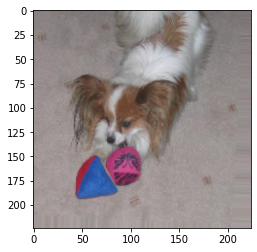

label=n02086910-papillon, index=6.0


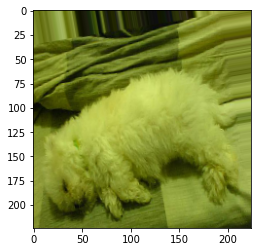

label=n02085936-Maltese_dog, index=2.0


In [54]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전처리할 함수 선언
def my_preprocessor(image):
  # 영상 데이터를 0 ~ 1 사이의 값으로 변환한다.
  return image/255.0

image_data_generator = ImageDataGenerator(
      rotation_range=10,      # 회전 최대 10도.
      width_shift_range=0.1,  # 좌우 이동 최대 10%
      height_shift_range=0.1, # 상하 이동 최대 10%
      horizontal_flip=True,   # 좌우 반전 한다.
      vertical_flip=False,    # 상하 반전 안한다.
      preprocessing_function=my_preprocessor # 데이터 전처리할 함수
).flow_from_directory(
      "dogs_prepared/train", # 영상 데이터 폴더
      target_size=(224,224), # 로딩한 후 변경할 크기
      batch_size=8,          # 한번에 꺼낼 영상 수
      class_mode="sparse"  , # 레이블 값을 one-hot 인코딩이 아닌 카테고리 인덱스로
)

label_2_index = image_data_generator.class_indices
index_2_label = {v: k for k, v in label_2_index.items()}

images, labels = image_data_generator.next()

for i in range(len(images)):
  plt.imshow(images[i])
  plt.show()
  category_index = labels[i]
  category_name = index_2_label[category_index]
  print("name={}, index={}".format(category_name, category_index))


# 영상 데이터 증강 - 로딩된 데이터에서

영상 증강 방법은 동일하다.

단지 flow_from_directory() 대신, flow() 함수를 사용하여 폴더 대신 이미 로딩한 데이터로 적용한다.

## 데이터 로딩

In [11]:
import tensorflow as tf 

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

## 증강 적용

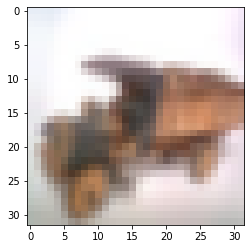

label=truck, index=9


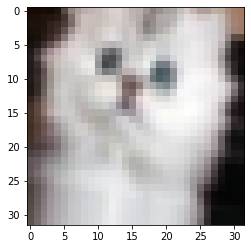

label=cat, index=3


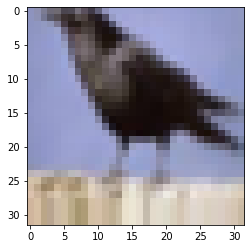

label=bird, index=2


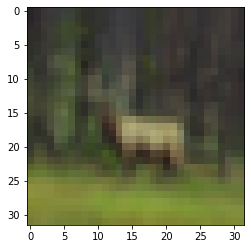

label=deer, index=4


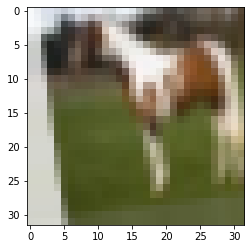

label=horse, index=7


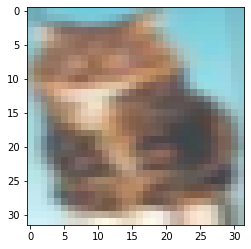

label=cat, index=3


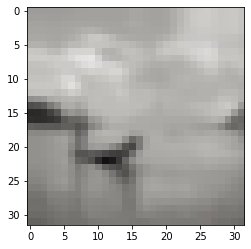

label=ship, index=8


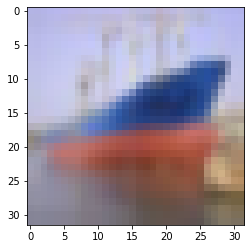

label=ship, index=8


In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전처리할 함수 선언
def my_preprocessor(image):
  # 영상 데이터를 0 ~ 1 사이의 값으로 변환한다.
  return image/255.0

image_data_generator = ImageDataGenerator(
      rotation_range=10,      # 회전 최대 10도.
      width_shift_range=0.1,  # 좌우 이동 최대 10%
      height_shift_range=0.1, # 상하 이동 최대 10%
      horizontal_flip=True,   # 좌우 반전 한다.
      vertical_flip=False,    # 상하 반전 안한다.
      preprocessing_function=my_preprocessor # 데이터 전처리할 함수
).flow(train_x, train_y, batch_size=8)

index_2_label = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck" }


images, labels = image_data_generator.next()

for i in range(len(images)):
  plt.imshow(images[i])
  plt.show()
  category_index = labels[i][0]
  category_name = index_2_label[category_index]
  print("label={}, index={}".format(category_name, category_index))


# 모델의 학습/평가/예측 적용

In [42]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 데이터 로딩


In [43]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

train_y = train_y.squeeze()
test_y = test_y.squeeze()

In [44]:
BATCH_SIZE = 64

def my_preprocessor(image):
  return image/255.0


## 데이터 증강을 위한 ImageDataGenerator

In [45]:

# train 데이터를 증강하고 validation_split으로 나눈다.
train_image_augmentator = ImageDataGenerator(
      rotation_range=10,     
      width_shift_range=0.1, 
      height_shift_range=0.1,
      horizontal_flip=True,  
      vertical_flip=False,   
      preprocessing_function=my_preprocessor,
      validation_split=0.2,   # validation 데이터 비율.
)

# test 데이터는 데이터 증강이 필요 없고, validation_split이 필요 없다.
test_image_augmentator = ImageDataGenerator(
      preprocessing_function=my_preprocessor,
)

## train/valid/test 데이터 생성

In [46]:

train_data_generator = train_image_augmentator.flow(
      train_x, train_y,
      batch_size=BATCH_SIZE,
      subset='training'     # subset 파라매터 값을 "training"으로 준다.
)

valid_data_generator = train_image_augmentator.flow(
      train_x, train_y,
      batch_size=BATCH_SIZE,
      subset='validation'     # subset 파라매터 값을 "validation"으로 준다.
)

test_data_generator = test_image_augmentator.flow(
      test_x, test_y,
      batch_size=BATCH_SIZE,
)


## 모델 준비

In [47]:
model = keras.Sequential()
model.add(Input((32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['acc'])
model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)            

## 학습에 적용

In [48]:
history = model.fit(
      train_data_generator,                 # train 데이터에 train_data_generator 설정
      validation_data=valid_data_generator, # valid 데이터에 valid_data_generator 설정
      epochs=10
)

Epoch 1/10
625/625 [==============================] - 23s 36ms/step - loss: 1.6794 - acc: 0.3726 - val_loss: 1.4661 - val_acc: 0.4644
Epoch 2/10
625/625 [==============================] - 22s 36ms/step - loss: 1.3221 - acc: 0.5209 - val_loss: 1.1742 - val_acc: 0.5818
Epoch 3/10
625/625 [==============================] - 22s 36ms/step - loss: 1.1655 - acc: 0.5821 - val_loss: 1.0869 - val_acc: 0.6188
Epoch 4/10
625/625 [==============================] - 22s 36ms/step - loss: 1.0586 - acc: 0.6253 - val_loss: 1.0400 - val_acc: 0.6352
Epoch 5/10
625/625 [==============================] - 22s 36ms/step - loss: 0.9839 - acc: 0.6518 - val_loss: 0.9537 - val_acc: 0.6703
Epoch 6/10
625/625 [==============================] - 23s 36ms/step - loss: 0.9321 - acc: 0.6713 - val_loss: 0.9133 - val_acc: 0.6808
Epoch 7/10
625/625 [==============================] - 22s 36ms/step - loss: 0.8805 - acc: 0.6904 - val_loss: 0.9675 - val_acc: 0.6600
Epoch 8/10
625/625 [==============================] - 22s 36ms

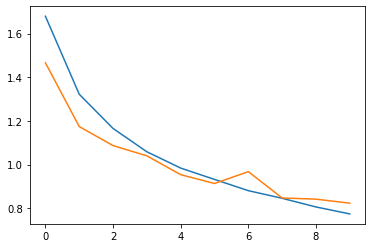

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 평가에 적용

In [50]:
loss, acc = model.evaluate(test_data_generator)   # 평가 데이터에 test_data_generator로 설정

print("loss=", loss)
print("acc=", acc)

156/156 [==============================] - 1s 4ms/step - loss: 0.7369 - acc: 0.7516
loss= 0.7368754148483276
acc= 0.7516000270843506


## 예측에 적용

In [51]:
test_batch_x, test_batch_y = test_data_generator.next()
y_ = model.predict(test_batch_x)
predicted = np.argmax(y_, axis=-1)

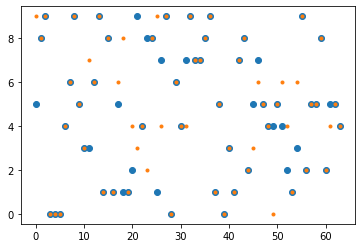

In [52]:
plt.plot(test_batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


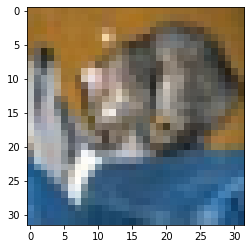

label=truck, index=9


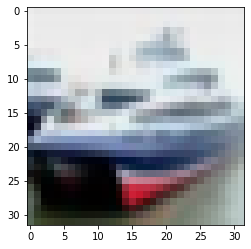

label=ship, index=8


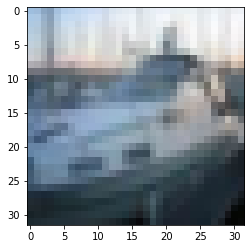

label=truck, index=9


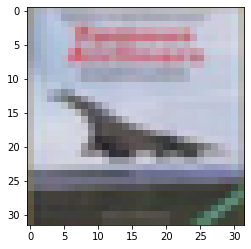

label=airplane, index=0


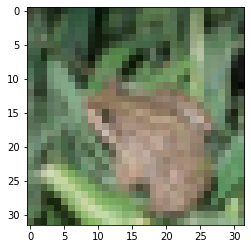

label=airplane, index=0


In [53]:
index_2_label = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck" }

for i in range(5):
  plt.imshow(test_x[i])
  plt.show()
  category_index = predicted[i]
  category_name = index_2_label[category_index]
  print("label={}, index={}".format(category_name, category_index))